In [317]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [318]:
# Part 1
breast_cancer = pd.read_csv('breast_cancer.csv', names=['ID','thick','size_uni','shape_uni','marg_adh','size_sec','bare_nuc','bland_chromo','norm_chromo','mitosis','outcome'])

breast_cancer

,ID,thick,size_uni,shape_uni,marg_adh,size_sec,bare_nuc,bland_chromo,norm_chromo,mitosis,outcome
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [319]:
breast_cancer = breast_cancer.drop('ID', axis=1)

breast_cancer = breast_cancer[(breast_cancer.thick != '?') & (breast_cancer.size_uni != '?') &
                             (breast_cancer.shape_uni != '?') & (breast_cancer.marg_adh != '?') &
                             (breast_cancer.size_sec != '?') & (breast_cancer.bare_nuc != '?') &
                             (breast_cancer.bland_chromo != '?') & (breast_cancer.norm_chromo != '?') & 
                             (breast_cancer.mitosis != '?') & (breast_cancer.outcome != '?')]

breast_cancer = breast_cancer.astype(int)
breast_cancer.outcome = breast_cancer.outcome.replace(2,0)
breast_cancer.outcome = breast_cancer.outcome.replace(4,1)
breast_cancer

,thick,size_uni,shape_uni,marg_adh,size_sec,bare_nuc,bland_chromo,norm_chromo,mitosis,outcome
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [320]:
# Part 2

def confusion_matrix(y_true, y_pred):
    
    # Find unique identifiers
    unique_classes = set(y_true) | set(y_pred)
    n_classes = len(unique_classes)
    
    # Create matrix (all zeros)
    matrix = np.zeros(shape=(n_classes, n_classes), dtype=int)
    
    # Pair up each actual outcome with the corresponding prediction
    actual_prediction = list(zip(y_true, y_pred))
    
    # For each pair, increment the correct position in the matrix
    for i,j in actual_prediction:
        matrix[i,j] += 1
        
    return matrix

def metrics(y, y_pred):
    
    scores = {}
    C = confusion_matrix(y, y_pred)
    
    
    scores['accuracy'] = C.diagonal().sum() / C.sum()
    
    if C.shape == (2,2):
        TN, FP, FN, TP = C.ravel() #  ravel flattens the array row by row
        scores['sensitivity'] = TP / (TP + FN)
        scores['specificity'] = TN / (TN + FP)
        scores['precision'] = TP / (TP + FP)
        scores['f1'] = (2 * scores['precision'] * scores['sensitivity']) / (scores['precision'] + scores['sensitivity'])
        
    else:
        pass
        
    return scores

In [321]:
# Part 3

def predict(X, w):
    return ((w[0] + X[:, :-1].dot(w[1:])) >= 0).astype(int)

In [322]:
# Part 4

def perceptron(data, alpha = 0.0001, epochs = 1000):
    track = 0
    w = np.zeros(len(data[0]))
    AllMetrics = []
    X = data[:, :-1]
    actual = data[:, -1]
    while track < epochs:
        
        score = w[0] + X.dot(w[1:])
        predictions = (score >= 0).astype(int)
        
        # Calculates the metrics for the specific epoch and adds it to an array
        metricsCalc = metrics(actual, predictions)
        metricsCalc['MPE'] = ((np.abs(actual - predictions) * np.abs(score)).mean())
        metricsCalc['epoch'] = (track)
        AllMetrics.append(metricsCalc)
        
        w[0] += (alpha * (actual - predictions)).sum()
        for i in range (len(w) - 1):
            w[i + 1] += (alpha * (actual - predictions) * X[:, i]).sum()
        
        track += 1

        
    # Sorts the list of dictionaries into 1 dictionary with lists
    AllMetricsSorted = {}
    
    
    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    F1 = []
    MPE = []
    Epoch = []
    for i in range(len(AllMetrics)):
        Accuracy.append(AllMetrics[i]['accuracy'])
        Sensitivity.append(AllMetrics[i]['sensitivity'])
        Specificity.append(AllMetrics[i]['specificity'])
        Precision.append(AllMetrics[i]['precision'])
        F1.append(AllMetrics[i]['f1'])
        MPE.append(AllMetrics[i]['MPE'])
        Epoch.append(AllMetrics[i]['epoch'])
        
    AllMetricsSorted['Accuracy'] = Accuracy
    AllMetricsSorted['Sensitivity'] = Sensitivity
    AllMetricsSorted['Specificity'] = Specificity
    AllMetricsSorted['Precision'] = Precision
    AllMetricsSorted['F1'] = F1
    AllMetricsSorted['MPE'] = MPE
    AllMetricsSorted['Epoch'] = Epoch
    
    
    return w, AllMetricsSorted

In [323]:
def perceptron_scikit(data):
    """ Run the scikit-learn Perceptron model on the data """
 
    X = data[data.columns[:-1]]
    y = data.iloc[:, -1]
    clf = lm.Perceptron()
    clf.fit(X,y)
    w = list(clf.intercept_) + list(clf.coef_[0])
    return w, clf.predict(X)

sciWeights, sciPred = perceptron_scikit(breast_cancer)
print(metrics(breast_cancer.iloc[:, -1], sciPred))

{'accuracy': 0.9224011713030746, 'sensitivity': 0.7907949790794979, 'specificity': 0.9932432432432432, 'precision': 0.984375, 'f1': 0.877030162412993}


In [324]:
# Part 5

breast_cancer_arr = np.array(breast_cancer)

PerceptronInitialValues, AllMetricsSorted = perceptron(breast_cancer_arr)
predictionsV1 = predict(breast_cancer_arr, PerceptronInitialValues)
print(metrics(breast_cancer.iloc[:, -1], predictionsV1))
print(PerceptronInitialValues)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


{'accuracy': 0.9633967789165446, 'sensitivity': 0.9121338912133892, 'specificity': 0.990990990990991, 'precision': 0.9819819819819819, 'f1': 0.945770065075922}
[-0.6078  0.0333 -0.0065  0.015   0.0181  0.0025  0.018   0.026   0.0091
  0.0427]


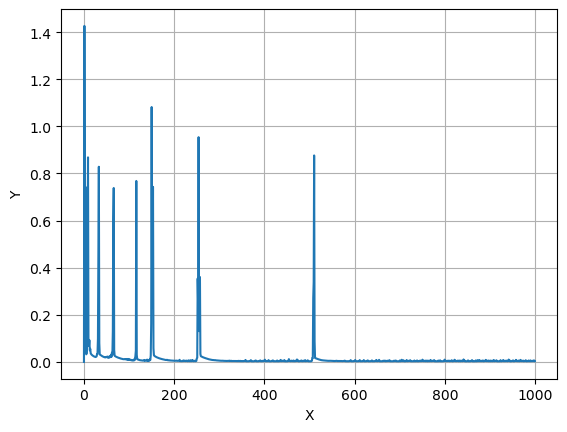

In [325]:
# Part 6

MPEdf1 = pd.DataFrame(list(zip(AllMetricsSorted['Epoch'], AllMetricsSorted['MPE'])), columns = ['X','Y'])
Accuracydf1 = pd.DataFrame(list(zip(AllMetricsSorted['Epoch'], AllMetricsSorted['Accuracy'])), columns = ['X','Y'])

# sns.scatterplot(MPEdf1, x='X', y='Y', s=300)
sns.lineplot(MPEdf1, x = 'X', y = 'Y')

plt.grid()

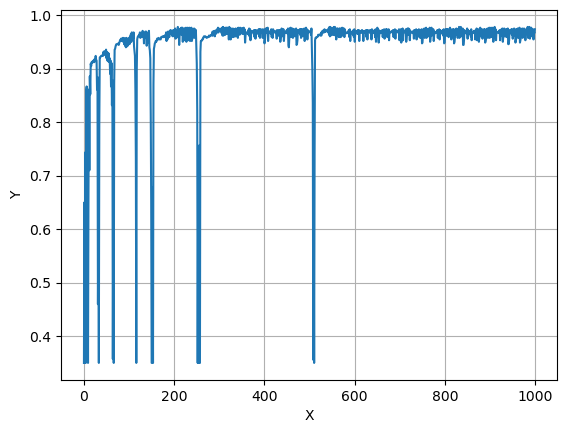

In [326]:
sns.lineplot(Accuracydf1, x = 'X', y = 'Y')

plt.grid()

In [327]:
# Part 7

# A - removed Clump Thickness
breast_cancer_arrV1 = np.array(breast_cancer.drop("thick", axis='columns'))

PerceptronValuesV1, delete = perceptron(breast_cancer_arrV1)

PredictionsV1 = predict(breast_cancer_arrV1, PerceptronValuesV1)

MetricsV1  = metrics(breast_cancer_arrV1[:, -1], PredictionsV1)
Version1 = [0, 1, 1, 1, 1, 1, 1, 1, 1, MetricsV1['accuracy'], 
            MetricsV1['sensitivity'], MetricsV1['specificity'], MetricsV1['precision'], MetricsV1['f1']]

print(Version1)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


[0, 1, 1, 1, 1, 1, 1, 1, 1, 0.9502196193265008, 0.8870292887029289, 0.9842342342342343, 0.9680365296803652, 0.9257641921397378]


In [328]:
# B - removed Uniformity of Cell Shape and Single Epithelial Cell Size
breast_cancer_arrV2 = np.array(breast_cancer.drop(["shape_uni", "size_sec"], axis='columns'))

PerceptronValuesV2, delete = perceptron(breast_cancer_arrV2)

PredictionsV2 = predict(breast_cancer_arrV2, PerceptronValuesV2)

MetricsV2  = metrics(breast_cancer_arrV2[:, -1], PredictionsV2)
Version2 = [1, 1, 0, 1, 0, 1, 1, 1, 1, MetricsV2['accuracy'], 
            MetricsV2['sensitivity'], MetricsV2['specificity'], MetricsV2['precision'], MetricsV2['f1']]

print(Version2)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


[1, 1, 0, 1, 0, 1, 1, 1, 1, 0.9531478770131772, 0.8828451882845189, 0.990990990990991, 0.9813953488372092, 0.9295154185022027]


In [329]:
# C - removed Marginal Adhesion, Bare Nuclei, and Normal Nucleoli
breast_cancer_arrV3 = np.array(breast_cancer.drop(["marg_adh", "bare_nuc", "norm_chromo"], axis='columns'))

PerceptronValuesV3, delete = perceptron(breast_cancer_arrV3)

PredictionsV3 = predict(breast_cancer_arrV3, PerceptronValuesV3)

MetricsV3  = metrics(breast_cancer_arrV3[:, -1], PredictionsV3)
Version3 = [1, 1, 1, 0, 1, 0, 1, 0, 1, MetricsV3['accuracy'], 
            MetricsV3['sensitivity'], MetricsV3['specificity'], MetricsV3['precision'], MetricsV3['f1']]

print(Version3)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


[1, 1, 1, 0, 1, 0, 1, 0, 1, 0.9677891654465594, 0.9707112970711297, 0.9662162162162162, 0.9392712550607287, 0.9547325102880658]


In [330]:
# D - removed Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin, and Mitoses
breast_cancer_arrV4 = np.array(breast_cancer.drop(["thick", "size_uni", "shape_uni", 
                                                   "bland_chromo", "mitosis"], axis='columns'))

PerceptronValuesV4, delete = perceptron(breast_cancer_arrV4)

PredictionsV4 = predict(breast_cancer_arrV4, PerceptronValuesV4)

MetricsV4  = metrics(breast_cancer_arrV4[:, -1], PredictionsV4)
Version4 = [0, 0, 0, 1, 1, 1, 0, 1, 0, MetricsV4['accuracy'], 
            MetricsV4['sensitivity'], MetricsV4['specificity'], MetricsV4['precision'], MetricsV4['f1']]

print(Version4)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


[0, 0, 0, 1, 1, 1, 0, 1, 0, 0.9560761346998536, 0.9372384937238494, 0.9662162162162162, 0.9372384937238494, 0.9372384937238494]


In [331]:
# 'ID','thick','size_uni','shape_uni',
# 'marg_adh','size_sec','bare_nuc','bland_chromo',
# 'norm_chromo','mitosis','outcome'

# E - removed
breast_cancer_arrV5 = np.array(breast_cancer.drop(["size_uni", "marg_adh", "bare_nuc", "norm_chromo"], axis='columns'))

PerceptronValuesV5, delete = perceptron(breast_cancer_arrV5)

PredictionsV5 = predict(breast_cancer_arrV5, PerceptronValuesV5)

MetricsV5  = metrics(breast_cancer_arrV5[:, -1], PredictionsV5)
Version5 = [1, 0, 1, 0, 1, 0, 1, 0, 1, MetricsV5['accuracy'], 
            MetricsV5['sensitivity'], MetricsV5['specificity'], MetricsV5['precision'], MetricsV5['f1']]

print(Version5)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


[1, 0, 1, 0, 1, 0, 1, 0, 1, 0.9531478770131772, 0.9037656903765691, 0.9797297297297297, 0.96, 0.9310344827586206]


In [332]:
# Original Model with no values removed

PerceptronValuesV0, delete = perceptron(breast_cancer_arr)

PredictionsV0 = predict(breast_cancer_arr, PerceptronValuesV0)

MetricsV0 = metrics(breast_cancer_arr[:, -1], PredictionsV0)
Version0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, MetricsV0['accuracy'], 
            MetricsV0['sensitivity'], MetricsV0['specificity'], MetricsV0['precision'], MetricsV0['f1']]

print(Version0)

/var/folders/xw/_8qyv8k11p5d2wbfd1ctcybm0000gn/T/ipykernel_59206/3306794995.py:33: RuntimeWarning: invalid value encountered in long_scalars
  scores['precision'] = TP / (TP + FP)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9633967789165446, 0.9121338912133892, 0.990990990990991, 0.9819819819819819, 0.945770065075922]


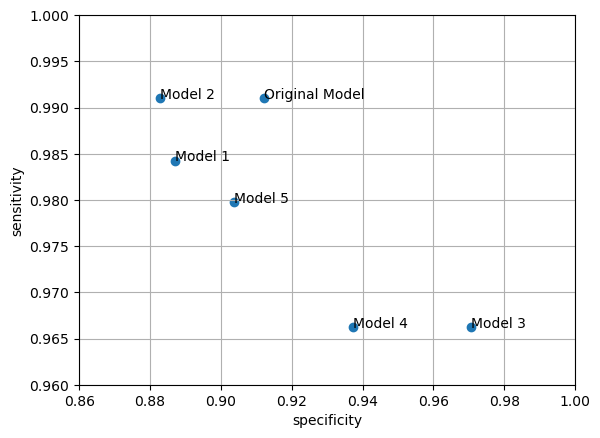

In [333]:
# Part 8

plt.xlim(0.86, 1.0)
plt.ylim(0.96, 1.0)

plt.xlabel("specificity")
plt.ylabel("sensitivity")

xData = [Version0[10], Version1[10], Version2[10], Version3[10], Version4[10], Version5[10]]
yData = [Version0[11], Version1[11], Version2[11], Version3[11], Version4[11], Version5[11]]

plt.scatter(xData, yData)

plt.text(Version0[10], Version0[11], 'Original Model')
plt.text(Version1[10], Version1[11], 'Model 1')
plt.text(Version2[10], Version2[11], 'Model 2')
plt.text(Version3[10], Version3[11], 'Model 3')
plt.text(Version4[10], Version4[11], 'Model 4')
plt.text(Version5[10], Version5[11], 'Model 5')

plt.grid()


# I would most likely chooses the original model which takes into account all of the weights,
# since we are trying to identify malignant breast cancer tumors, we want to have the highest sensitivity
# so we don't get as many false negatives because cancer can become life threatening. Even though we will get
# more false positives because the specifity isn't as high as Model 3, I believe it is worth it because we will
# get less false negatives. The original model has the highest sensitivity and doesn't compromise as much 
# specificity as model 2 so that is another reason I believe the original model is the best.